## Overview

This analysis is of a dataset that comes from [kaggle](https://www.kaggle.com/geomack/spotifyclassification) and represents a list of songs and their attributes that a user liked or didn't like. Information about the Spotify API that the dataset was pulled from and the data variables themselves can be found here: [Spotify API](https://developer.spotify.com/web-api/get-audio-features/).

This analysis will aim to predict if the user likes or doesn't like a song. To predict what songs a user likes algorithms such as logistic regression, decision trees and random forests, kNN, and potentially SVM if the data can be separated linearly. A bonus, if time permits, would be to clustering the songs by artist or genre (if a linking dataset can be found).


## The Data

First, of course, libraries will be imported, the data will be read in, and some initial exploring will be done to get a feel for the data. Below is some basic info about the data (number of columns, number of rows, column names, column structure, etc.), and the first 6 rows of the data. Further exploring will be done later on, but from the below you can see there are 17 columns, and 2017 entries. There are no `NA` values in the data and most of the variables are a on a scale from 0-1.

In [62]:
# import bank
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# read in data
spotify_songs = pd.read_csv('datasets_1833_3172_data.csv')

# explore data
print('Info About Data:')
print('\n')
print(spotify_songs.info())
print('\n')
print('NA/blanks Output by Column:')
print('\n')
print(spotify_songs.isna().sum())
print('\n')
spotify_songs.head()

Info About Data:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## Transforming

This dataset comes out of the box about as clean as you can get. The only minor thing that will bee manipulated and kept in a seperate dataset for visualizatoin perposes will be `mode`, `key`, and `target` columns. For some analises, scaling will be used.

In [63]:
spotify_songs_viz = spotify_songs

## Exploring

This section will look at some more detailed information about the data.

First, we will look at the 'Top 20' artists this users played in these 2017 observations. We can see this user has listened to a variety of music, but mostly 'likes' R&B/Rap and Electronic (Drake, Kanye, Crystal Castles). What's interesting is the number of songs a person listened to from an artist without actually liking any of the songs. For example, Backstreet Boys and Walk The Moon were in the top 5 artist his users played, but none of the somes were liked. *I can relate, as I rarely will actually 'like' I listen to on Spotify. While I hope Spotify takes this into account, I will use this analysis to as incentive to boost my interaction with Spotify so they play more music I like* While we will disregaurd this for the purpuses, of this analysis, it's something to keep in mind.

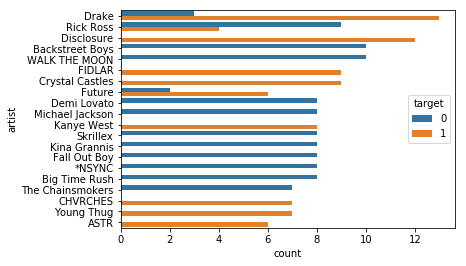

In [64]:
ax = sns.countplot(y = "artist", hue = "target",
                   data = spotify_songs_viz,
                   order = spotify_songs_viz.artist.value_counts().iloc[:20].index)

## Analysis

First, the dataset will be split into training and testing datasets.

In [66]:

# set up x and y
x = spotify_songs.loc[:, 'acousticness':'valence']
y = spotify_songs.loc[:, 'target']

# splitting the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)



### kNN

For our first predictions, we will use `kNN`. `kNN` trys to predict the target not by classifying a song with what is the song is closest too. Here we will run 3 different `kNN`'s tests  to try to get the best accuracy.

For the first `kNN`, `n_neighbors` will be set to 3 and there will not be any scaling done.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [68]:
# fitting classifier to the training set
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

# predicting the test set results
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)
print(accuracy_score(y_test, y_pred))

confusion matrix:
[[107  93]
 [104 100]]
0.5123762376237624


This produces an accuracy little bit better than a coin flip. Now, lets try the same test, but after we scale the data. Scaling is known to improve the accuracy drastically.

In [71]:
# feature scaling
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

# fitting classifier to the training set
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train_sc, y_train)

# predicting the test set results
y_pred = classifier.predict(x_test_sc)

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)
print(accuracy_score(y_test, y_pred))

confusion matrix:
[[156  44]
 [ 90 114]]
0.6683168316831684


Scaling the features did, indeed, improve the accuracy. However, a very low `n_neighbors` was used. With the variety of music this user listens to and taking into account the 'complexty' of a song, increasing the number of `n_neighbors` should, in theory, improve the accuracy.


In [87]:
# fitting classifier to the training set
classifier = KNeighborsClassifier(n_neighbors = 30, metric = 'minkowski', p = 2)
classifier.fit(x_train_sc, y_train)

# predicting the test set results
y_pred = classifier.predict(x_test_sc)

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)
print(accuracy_score(y_test, y_pred))

confusion matrix:
[[173  27]
 [105  99]]
0.6732673267326733


However, it appears increasing the `n_neighbors` had little effect on the accuracy.

Next we will try some other techinques to improve our accuracy.

### bibli
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

### notes

Do I need to scale my data?